In [1]:
import tensorflow as tf
tf.debugging.set_log_device_placement(True)

import os
# use CPU
#os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
#os.environ["CUDA_VISIBLE_DEVICES"] = ""
# use GPU 0,1
os.environ["CUDA_VISIBLE_DEVICES"]="3"

'''
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)
    '''

'\ngpus = tf.config.experimental.list_physical_devices(\'GPU\')\nif gpus:\n  # Restrict TensorFlow to only use the first GPU\n  try:\n    tf.config.experimental.set_visible_devices(gpus[0], \'GPU\')\n    logical_gpus = tf.config.experimental.list_logical_devices(\'GPU\')\n    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")\n  except RuntimeError as e:\n    # Visible devices must be set before GPUs have been initialized\n    print(e)\n    '

In [2]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
import resource
import numpy as np
from skimage import img_as_bool, io, color

#soft, hard = resource.getrlimit(resource.RLIMIT_NOFILE)
#resource.setrlimit(resource.RLIMIT_NOFILE, (hard, hard))

thickTrainDir = "data/train/thick/"
thinTrainDir = "data/train/thin/"
thickValDir = "data/validation/thick/"
thinValDir = "data/validation/thin/"

X_train = []
y_train = []
X_val = []
y_val = []

#thickImgs = os.listdir(thickTrainDir)
#for thickImg in thickImgs:
#    imgPath = thickTrainDir + thickImg
#    if not os.path.isdir(imgPath) :
#        x = load_img(imgPath)
#        x = img_as_bool(color.rgb2gray(io.imread(imgPath)))
#        x_train.append(x)

#x_train = np.array(x_train)

# se leen todas la imagenes de un directorio, se convierten en matriz y se guardan en imglist
# el tipo de imagen se guarda en labels
def appendImgs(imglist, labels, directory):
    imgs = os.listdir(directory)
    for img in imgs:
        imgPath = directory + img
        if not os.path.isdir(imgPath) :
            x = load_img(imgPath)
            x = img_as_bool(color.rgb2gray(io.imread(imgPath)))
            imglist.append(x)
            if 'thick' in imgPath:
                labels.append(1)
            elif 'thin' in imgPath:
                labels.append(0)

appendImgs(X_train, y_train, thickTrainDir)
appendImgs(X_train, y_train, thinTrainDir)

appendImgs(X_val, y_val, thickValDir)
appendImgs(X_val, y_val, thinValDir)

X_train = np.array(X_train).astype(int)
y_train = np.array(y_train)

X_val = np.array(X_val).astype(int)
y_val = np.array(y_val)

#X_train.shape

print('X_train.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)

print('X_val.shape = ', X_val.shape)
print('y_val.shape = ', y_val.shape)

#print(X_train)
#train_thick =   

# create generator
#datagen = ImageDataGenerator()

Using TensorFlow backend.
/home/aalejo/anaconda3/envs/iaenv/lib/python3.7/site-packages/skimage/util/dtype.py:131: UserWarning: Possible sign loss when converting negative image of type float64 to positive image of type bool.
  .format(dtypeobj_in, dtypeobj_out))
/home/aalejo/anaconda3/envs/iaenv/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to bool
  .format(dtypeobj_in, dtypeobj_out))


X_train.shape =  (2000, 256, 256)
y_train.shape =  (2000,)
X_val.shape =  (400, 256, 256)
y_val.shape =  (400,)


In [3]:
print("%d mb" % ((X_train.size * X_train.itemsize)/(1024*1024)))

1000 mb


In [4]:
type(X_train)

numpy.ndarray

Text(0.5, 1.0, 'Fibra delgada (4px)')

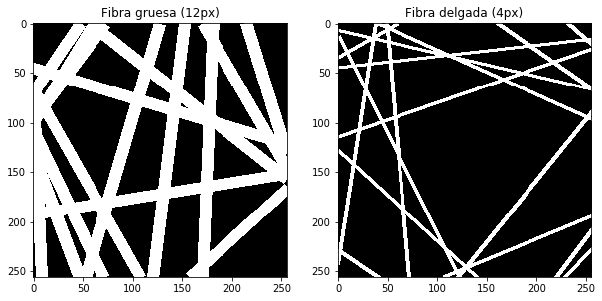

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import random

random_image_thick = random.randint(0, X_train.shape[0]/2-1)
random_image_thin = random.randint(X_train.shape[0]/2,X_train.shape[0])

#plt.imshow(X_train[random_image_thick],cmap='gray')
#plt.show()
#plt.imshow(X_train[random_image_thin],cmap='gray')


fig, axs = plt.subplots(1, 2, figsize=(10,10))

axs[0].imshow(X_train[random_image_thick],cmap='gray')
axs[0].set_title("Fibra gruesa (12px)")
axs[1].imshow(X_train[random_image_thin],cmap='gray')
axs[1].set_title("Fibra delgada (4px)")


In [6]:
import keras
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

print('version de tensorflow')
print(tf.__version__)

NUM_CLASSES = 2
NUM_FILTERS = 128

#bs = 32
#epochs = 10
#lr = 0.001

#model = Sequential()
#model.add(Flatten(input_shape=X_train[0].shape))
#model.add(Dense(128, activation='relu'))
#model.add(Dense(2, activation='softmax'))
#model.compile(optimizer=SGD(lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.summary()


#X_train = X_train.reshape(X_train.shape[0], 256, 256, 1)
#X_val = X_val.reshape(X_val.shape[0], 256, 256, 1)

input_shape = (256,256)
#input_shape = (256, 256, 1)
#input_shape = (256, 256, 3)

#print('X_train.shape:', X_train.shape)

model = Sequential()
model.add(Conv2D(NUM_FILTERS, kernel_size=(3,3), activation=tf.nn.relu, input_shape=(256,256,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(8, 8)))
model.add(Dropout(0.25))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
#model.add(Dense(64, activation=tf.nn.relu))
#model.add(Dense(32, activation=tf.nn.relu))
model.add(Dropout(0.5))
model.add(Dense(2,activation=tf.nn.softmax))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()


##model building
#model = Sequential()
#convolutional layer with rectified linear unit activation
#model.add(Conv2D(32, kernel_size=(3, 3),
                 #activation='relu',
                 #input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
#model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
#model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
#model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
#model.add(Flatten())
#fully connected to get all relevant data
#model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
#model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
#model.add(Dense(num_category, activation='softmax'))

version de tensorflow
2.0.0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in devic

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#BATCH_SIZE = 128
BATCH_SIZE = 32
EPOCHS = 20
# log = model.fit(X_train, y_train, batch_size=bs, epochs=epochs, validation_data=[X_val, y_val])
#log = model.fit(x=X_train,y=y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_val, y_val))
#log = model.fit(x=X_train,y=y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_val, y_val), verbose=1)

#log = model.fit(x=X_train,y=y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_val, y_val), verbose=1)
'''
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(256, 256),
    batch_size=BATCH_SIZE,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    'data/validation',
    target_size=(256, 256),
    batch_size=BATCH_SIZE,
    class_mode='binary')
    
log = model.fit_generator(
    train_generator,
    steps_per_epoch=2000,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=800)    

# construct the training image generator for data augmentation
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
	horizontal_flip=True, fill_mode="nearest")

# train the network
log = model.fit_generator(aug.flow(X_train, y_train, batch_size=BATCH_SIZE),
	validation_data=(X_val, y_val), steps_per_epoch=len(X_train) // BATCH_SIZE,
	epochs=EPOCHS)
'''

#from tensorflow.keras.preprocessing.image import ImageDataGenerator
'''
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(256, 256),
        batch_size=8,
        classes=['thick', 'thin'],
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(256, 256),
        batch_size=8,
        classes=['thick', 'thin'],
        class_mode='binary')
        

def train_generator():
    while 1:
        for i in range(1000):
            yield X_train[i], y_train[i]


def validation_generator():
    while 1:
        for i in range(200):
            yield X_val[i], y_val[i]
'''

import math

class DataGenerator(tf.compat.v2.keras.utils.Sequence):
    def __init__(self, X_data , y_data, batch_size, dim, n_classes,
                 to_fit, shuffle = True):
        self.batch_size = batch_size
        self.X_data = X_data
        self.labels = y_data
        self.y_data = y_data
        self.to_fit = to_fit
        self.n_classes = n_classes
        self.dim = dim
        self.shuffle = shuffle
        self.n = 0
        self.list_IDs = np.arange(len(self.X_data))
        self.on_epoch_end()
    def __next__(self):
        # Get one batch of data
        data = self.__getitem__(self.n)
        # Batch index
        self.n += 1
        
        # If we have processed the entire dataset then
        if self.n >= self.__len__():
            self.on_epoch_end
            self.n = 0
        
        return data
    def __len__(self):
        # Return the number of batches of the dataset
        return math.ceil(len(self.indexes)/self.batch_size)
    def __getitem__(self, index):
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]
        
        X = self._generate_x(list_IDs_temp)
        
        if self.to_fit:
            y = self._generate_y(list_IDs_temp)
            return X, y
        else:
            return X
    def on_epoch_end(self):
        
        self.indexes = np.arange(len(self.X_data))
        
        if self.shuffle: 
            np.random.shuffle(self.indexes)
            
    def _generate_x(self, list_IDs_temp):
               
        X = np.empty((self.batch_size, *self.dim))
        
        for i, ID in enumerate(list_IDs_temp):
            
            X[i,] = self.X_data[ID]
            
            # Normalize data
            X = (X/255).astype('float32')
            
        return X[:,:,:, np.newaxis]
    
    def _generate_y(self, list_IDs_temp):
        
        y = np.empty(self.batch_size)
        
        for i, ID in enumerate(list_IDs_temp):
            
            y[i] = self.y_data[ID]
            
        return keras.utils.to_categorical(y,num_classes=self.n_classes)
        #return keras.utils.to_categorical(y,num_classes=2)
        #return y[:,np.newaxis]
            

train_generator = DataGenerator(X_train, y_train, batch_size = 32,
                                dim = input_shape,
                                n_classes=2, 
                                to_fit=True, shuffle=True)

val_generator =  DataGenerator(X_val, y_val, batch_size=32, 
                               dim = input_shape, 
                               n_classes = 2, 
                               to_fit=True, shuffle=True)            



In [8]:
def generator(features, labels, batch_size):
    # Create empty arrays to contain batch of features and labels
    batch_features = np.zeros((batch_size, 64, 64, 3))
    batch_labels = np.zeros((batch_size,1))
    while True:
        for i in range(batch_size):
            # choose random index in features
            index = random.choice(len(features),1)
            batch_features[i] = some_processing(features[index])
            batch_labels[i] = labels[index]
        yield batch_features, batch_labels

In [9]:
tmp = keras.utils.to_categorical([0,1,0,1],num_classes=2)
tmp.shape

(4, 2)

In [10]:
images, labels = next(train_generator)
print(images.shape)
print(labels.shape)

(32, 256, 256, 1)
(32, 2)


In [11]:
steps_per_epoch = len(train_generator)
validation_steps = len(val_generator)

In [12]:
model.fit_generator(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=10
        #,
        #validation_data=val_generator,
        #validation_steps=validation_steps
    )

Executing op Reshape in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 1/10


ValueError: Error when checking target: expected dense_2 to have shape (1,) but got array with shape (2,)

In [ ]:
plt.plot(log.history['loss'], label='train')
plt.plot(log.history['val_loss'], label='validation')
plt.legend()

In [ ]:
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
model.save("model.h5")
print("Saved model to disk")

In [9]:
img_width,img_height = 256,256
#img = load_img('data/validation/thick/0001.png',False,target_size=(img_width,img_height))

test_dir = "data/test/"

test_imgs = os.listdir(test_dir)
predicciones = []
imagenes = []
for img in test_imgs:
    imgPath = test_dir + img
    if not os.path.isdir(imgPath) :
        imgBool = img_as_bool(color.rgb2gray(io.imread(imgPath)))
        imagenes.append(imgBool)
        
        x = img_to_array(imgBool)
        x = np.expand_dims(x, axis=0)
        clases = model.predict_classes(x)
        clase = None
        if 1 in clases:
            clase = "Fibra gruesa"
        elif 0 in clases:
            clase = "Fibra delgada"
        predicciones.append(clase)
        print(img, " es ", clase)


#img = img_as_bool(color.rgb2gray(io.imread('data/test/0001.png')))
#x = img_to_array(img)
#x = np.expand_dims(x, axis=0)
#preds = model.predict_classes(x)
#prob = model.predict_proba(x)
#print(preds, prob)
#preds

0020.png  es  Fibra gruesa
0016.png  es  Fibra gruesa
0003.png  es  Fibra delgada
0012.png  es  Fibra gruesa
0013.png  es  Fibra gruesa
0007.png  es  Fibra delgada
0015.png  es  Fibra gruesa
0002.png  es  Fibra delgada
0019.png  es  Fibra gruesa
0001.png  es  Fibra delgada
0004.png  es  Fibra delgada
0006.png  es  Fibra delgada
0011.png  es  Fibra gruesa
0018.png  es  Fibra gruesa
0005.png  es  Fibra delgada
0017.png  es  Fibra gruesa
0014.png  es  Fibra gruesa
0008.png  es  Fibra delgada
0010.png  es  Fibra gruesa
0009.png  es  Fibra gruesa


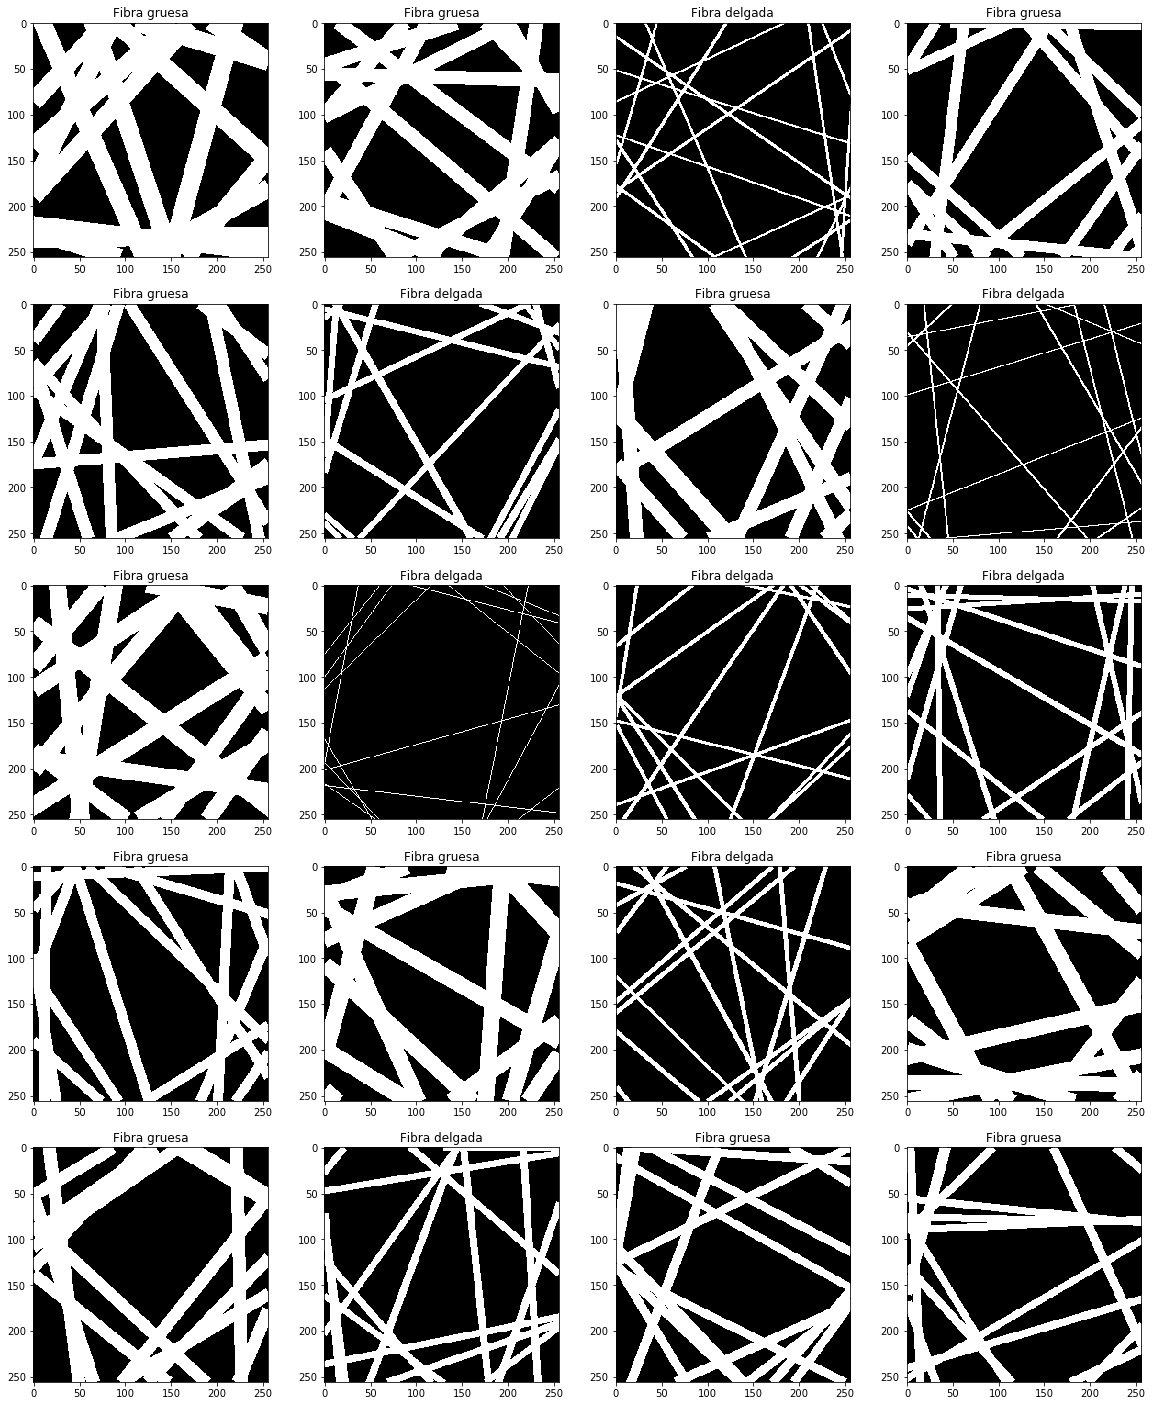

In [15]:
import math

#img = img_as_bool(color.rgb2gray(io.imread('data/test/0001.png')))
#x = img_to_array(img)
#x = np.array(img)
#plt.imshow(x)

filas = math.ceil(len(imagenes)/4)
fig, axs = plt.subplots(filas, 4, figsize=(20,25))

fila = 0
col = 0

for k, img in enumerate(imagenes):
    
    col = col % 4
    
    axs[fila, col].imshow(np.array(img),cmap='gray')
    axs[fila, col].set_title(predicciones[k])
    
    col+=1
    
    if col == 4:
        fila+=1
    

#axs[0].imshow(X_train[random_image_thick],cmap='gray')
#axs[0].set_title("Fibra gruesa (12px)")
#axs[1].imshow(X_train[random_image_thin],cmap='gray')
#axs[1].set_title("Fibra delgada (4px)")
